<a href="https://colab.research.google.com/github/Ramjat19/Clustering-and-Classification-Image-Compression/blob/main/B22EE054_pa5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [ ]:
import numpy as np

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/test.png')
pixels = img.reshape(-1, 3)
img = img.astype(float)

(a) Compute Centroid Function which return centroids of the clusters

In [ ]:
def computeCentroid(X):
  centroid = np.mean(X, axis = 0)
  return centroid

(b) mykmeans function which returns centroids and clusters, clusters is an array which has labels of clusters of reshaped image.

In [ ]:
def mykmeans(X, k):
  X = X.reshape(-1, 3)
  centroids = X[np.random.choice(X.shape[0], k, replace=False)]
  m = X.shape[0]
  clusters = np.array([0,]*X.shape[0])
  ipoch = 10
  for p in range(ipoch):
    for i in range(m):
      distances = np.linalg.norm(X[i] - centroids, axis=1)
      cluster = np.argmin(distances, axis=0)
      clusters[i] = cluster
    for x in range(k):
      X_cluster = X[clusters == x]
      centroids[x] = X_cluster.mean(axis=0)
  return centroids, clusters

(c) Compressed images using mykmeans(scratch code for Kmeans Clustering) for different values of k(no of clusters)

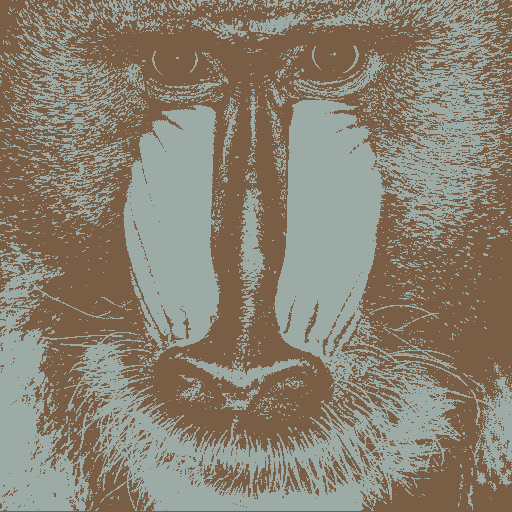

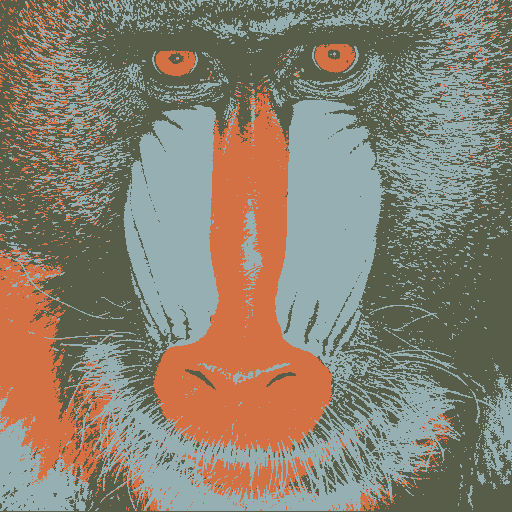

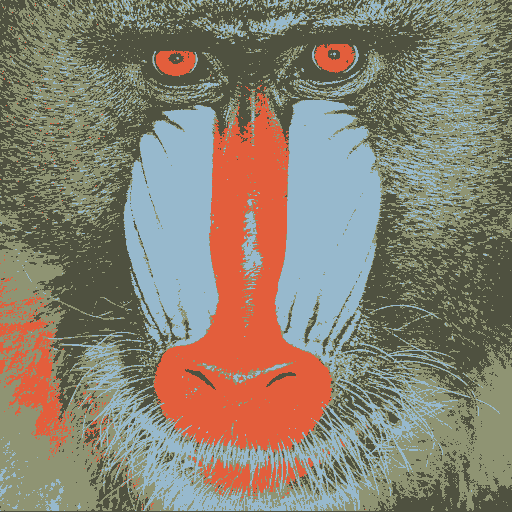

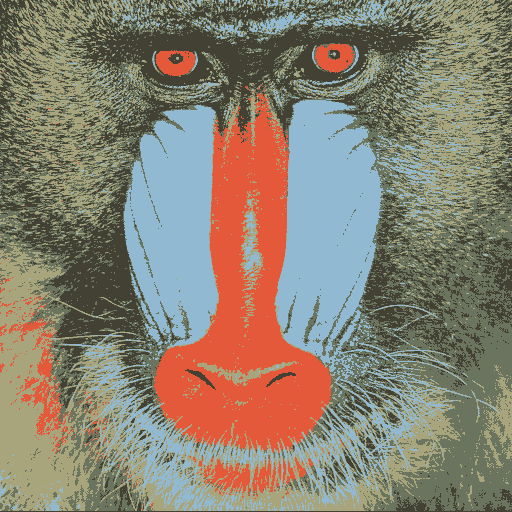

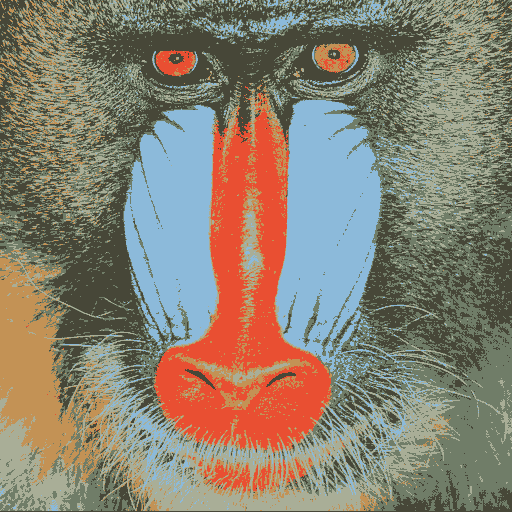

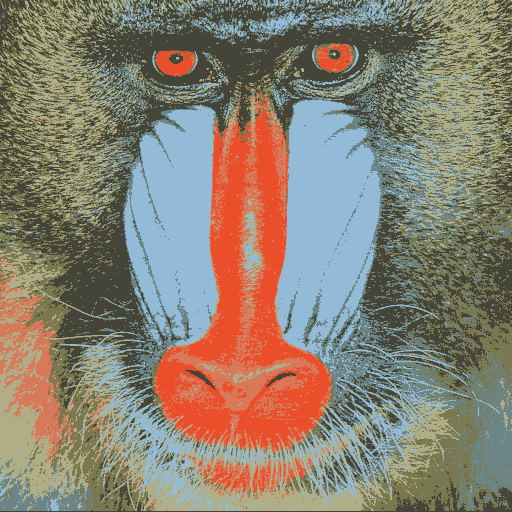

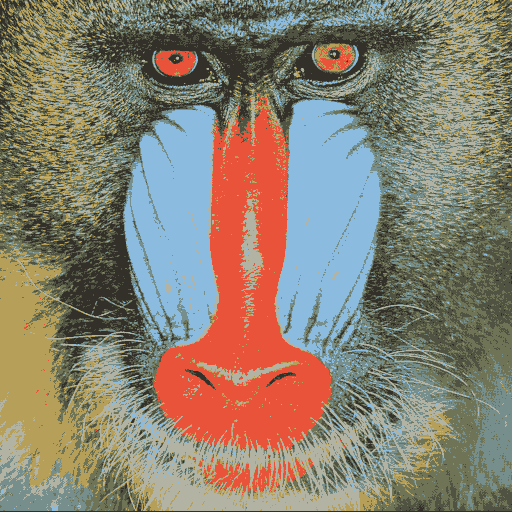

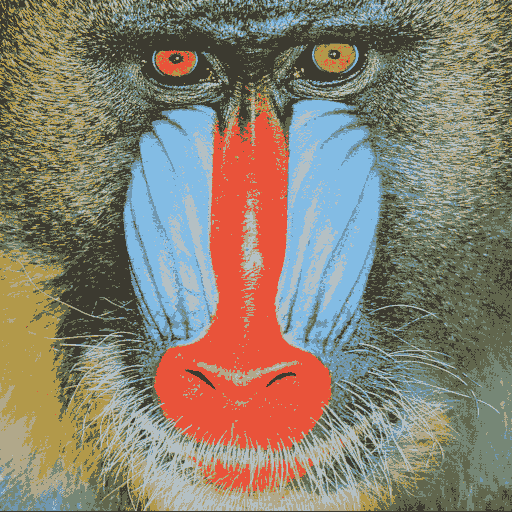

In [ ]:
k=10
for i in range(2, k):
  centroids, clusters = mykmeans(img, i)
  img_array = centroids[clusters]
  compressed_img = img_array.reshape(img.shape)
  cv2_imshow(compressed_img)

Original Image

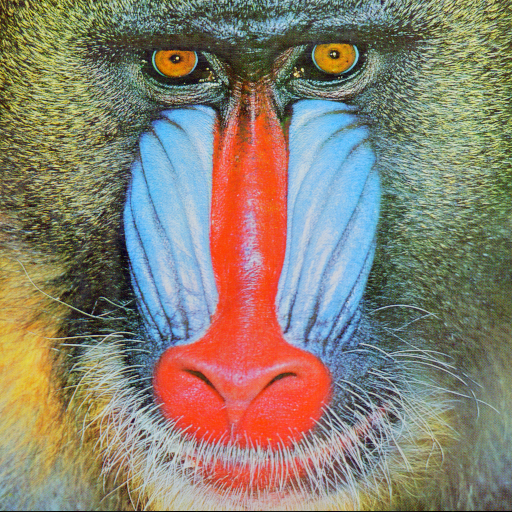

In [ ]:
cv2_imshow(img)

Compressed images using sklearn library for different values of k(no of clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


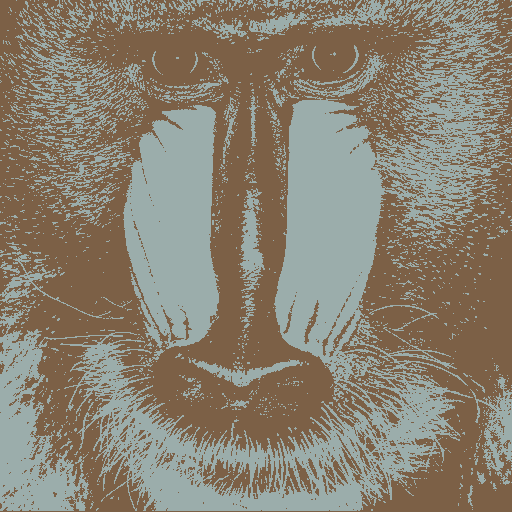

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


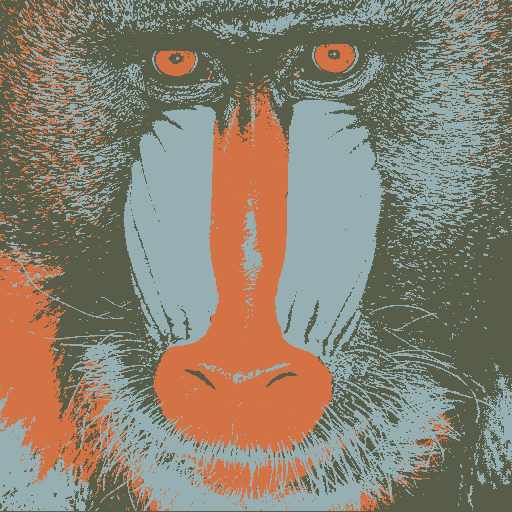

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


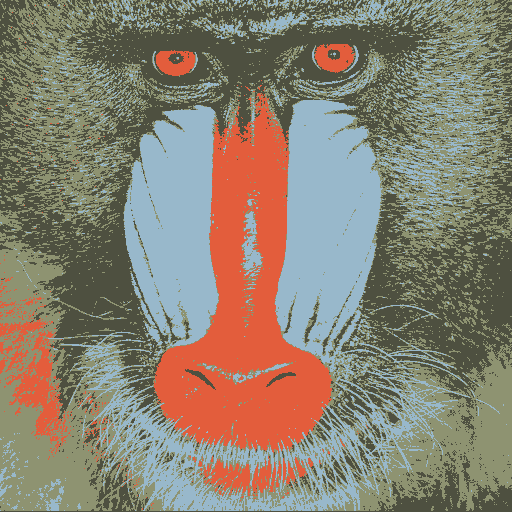

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


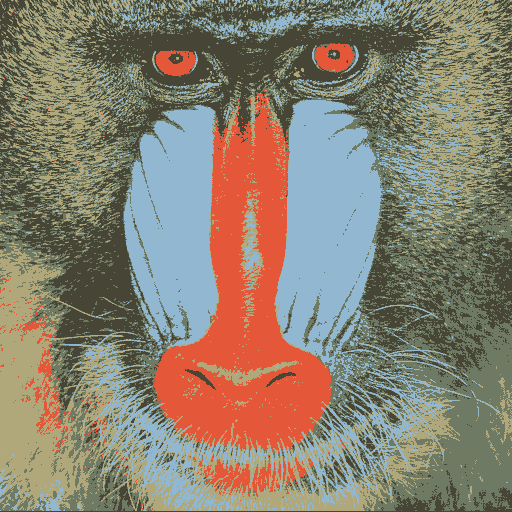

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


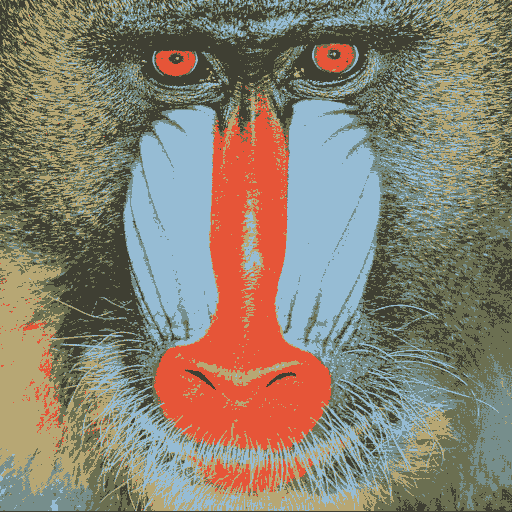

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


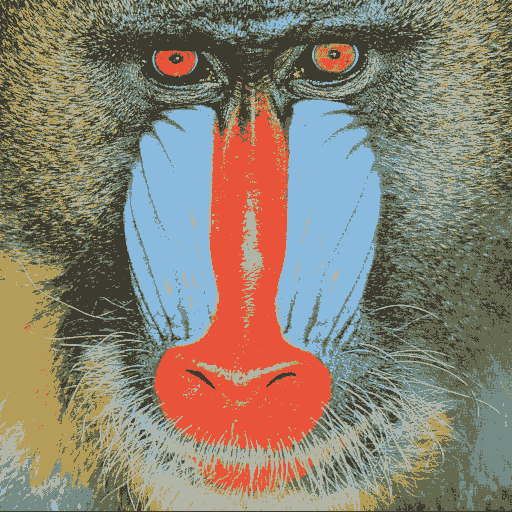

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


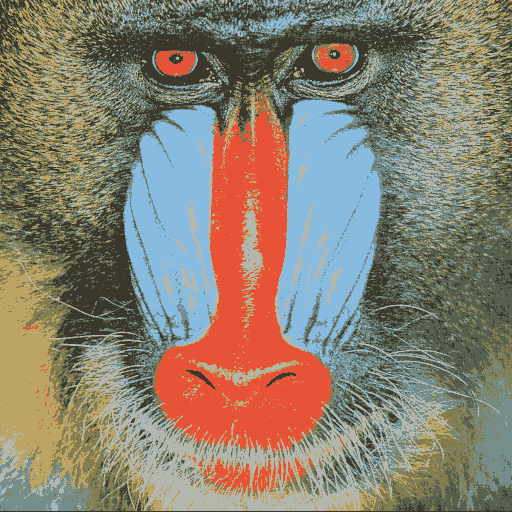

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


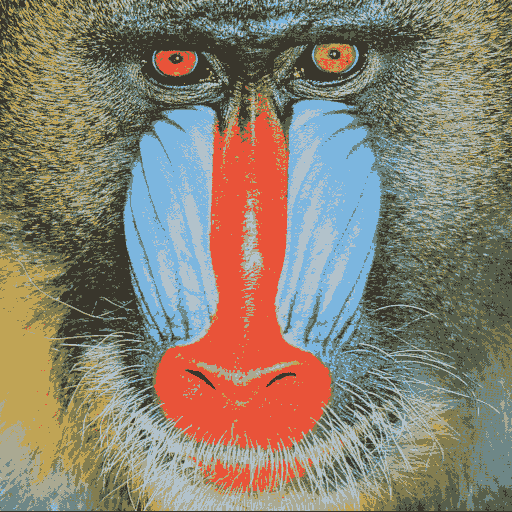

In [ ]:
from sklearn.cluster import KMeans

for i in range(2,k):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pixels)
  kmeans_centroids = kmeans.cluster_centers_
  kmeans_clusters = kmeans.labels_
  kmeans_img_array = kmeans_centroids[kmeans_clusters]
  kmeans_compressed_img =kmeans_img_array.reshape(img.shape)
  cv2_imshow(kmeans_compressed_img)

# Problem 2

## TASK-1

(a) Dataset Loading and DataFrame generation

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris(as_frame=True)
iris
df = iris.data[['petal length (cm)', 'petal width (cm)']].copy()
df['target'] = iris.target
df.sample(8)

,petal length (cm),petal width (cm),target
37,1.4,0.1,0
104,5.8,2.2,2
58,4.6,1.3,1
49,1.4,0.2,0
19,1.5,0.3,0
70,4.8,1.8,1
128,5.6,2.1,2
63,4.7,1.4,1


Selecting 'setosa' and 'versicolor' classes for binary classification

In [ ]:
data = df[df['target'].isin([0, 1])]
data.sample(8)

,petal length (cm),petal width (cm),target
41,1.3,0.3,0
91,4.6,1.4,1
88,4.1,1.3,1
95,4.2,1.2,1
75,4.4,1.4,1
28,1.4,0.2,0
37,1.4,0.1,0
46,1.6,0.2,0


Data Normalization and splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data[['petal length (cm)', 'petal width (cm)']]
Y = data['target']
scaler = StandardScaler()
X = StandardScaler().fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=34)

(b) Training a LinearSVC on the training data and plotting decision boudary on train data

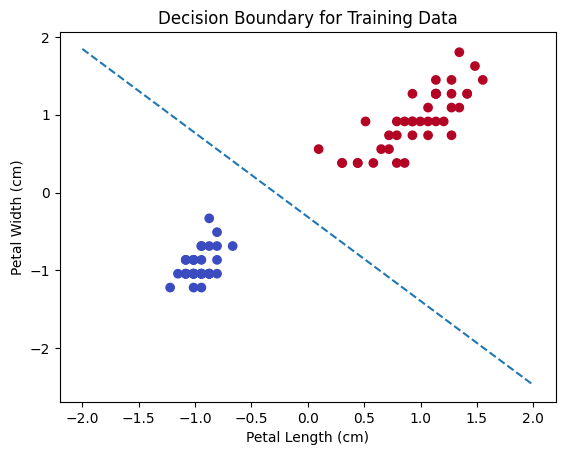

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')

coefficient = svm.coef_
a0 = coefficient[0]
a1 = -a0[0] / a0[1]
x_cord= np.arange(-2, 2.1, 0.1)
y_cord = a1 * x_cord - (svm.intercept_[0]) / a0[1]

plt.plot(x_cord, y_cord, linestyle='--')
plt.ylabel('Petal Width (cm)')
plt.xlabel('Petal Length (cm)')
plt.title('Decision Boundary for Training Data')
plt.show()

Decision boudary on test data using LinearSVCmodel

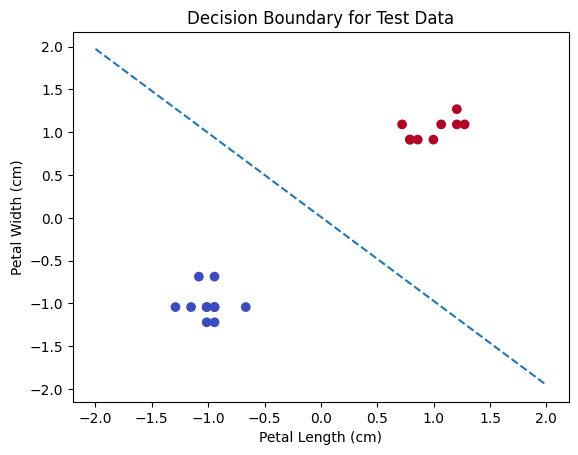

In [ ]:
svm.fit(X_test, y_test)

coeff_test = svm.coef_
a0_test = coeff_test[0]
a1_test = -a0_test[0] / a0_test[1]
x_cord_test= np.arange(-2, 2.1, 0.1)
y_cord_test = a1_test * x_cord_test - (svm.intercept_[0]) / a0_test[1]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm')
plt.plot(x_cord_test, y_cord_test, linestyle='--')
plt.ylabel('Petal Width (cm)')
plt.xlabel('Petal Length (cm)')
plt.title('Decision Boundary for Test Data')
plt.show()

## TASK-2

(a) Synthetic Data generation using make-moons() function from sklearn library and storind the data into a Dataframe

In [ ]:
from sklearn.datasets import make_moons
import pandas as pd

df = make_moons(n_samples=500, noise=0.05, random_state=22)
data = df[0]
data = pd.DataFrame(data)
data['label'] = df[1]
data.sample(9)

,0,1,label
47,0.586275,0.812158,0
334,1.711644,-0.172740,1
86,1.108111,-0.473348,1
42,1.925572,0.111518,1
142,0.786684,0.624361,0
270,0.284990,0.966221,0
415,0.497870,0.911078,0
439,1.983879,0.228616,1
170,0.007792,0.530200,1


In [ ]:
mis_rate = 0.05
num_mis = int(len(data)*mis_rate)
indices = np.random.choice(data.index, size=num_mis, replace=False)
data.loc[indices, 'label'] = 1 - data.loc[indices, 'label']

Plotting synthetic Data with 5% noise

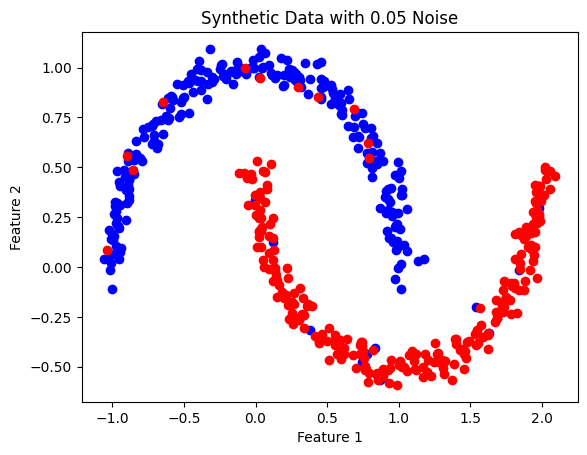

In [ ]:
plt.scatter(data[data['label'] == 0][0], data[data['label'] == 0][1], color='blue')
plt.scatter(data[data['label'] == 1][0], data[data['label'] == 1][1], color='red')
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.title('Synthetic Data with 0.05 Noise')
plt.show()

(b) Impementation of SVM model with linear kernel using SVC and plotting the decision boudary

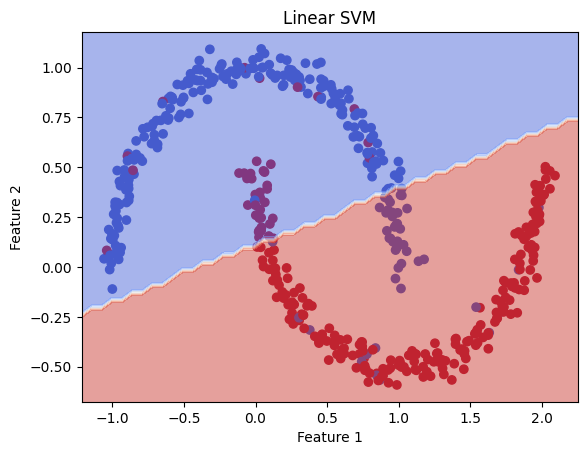

In [ ]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(data[[0, 1]], data['label'])
plt.scatter(data[0], data[1], c=data['label'], cmap='coolwarm')
x_limit = plt.xlim()
y_limit = plt.ylim()

x_cordi, y_cordi = np.meshgrid(np.linspace(*x_limit, 50), np.linspace(*y_limit, 50))

Z_linear = svm_linear.predict(np.column_stack((x_cordi.reshape(-1, ), y_cordi.reshape(-1, ))))
Z_linear = Z_linear.reshape(x_cordi.shape)
plt.contourf(x_cordi, y_cordi, Z_linear, alpha=0.5, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM')
plt.show()

Impementation of SVM model with ploynomial kernel using SVC and plotting the decision boudary

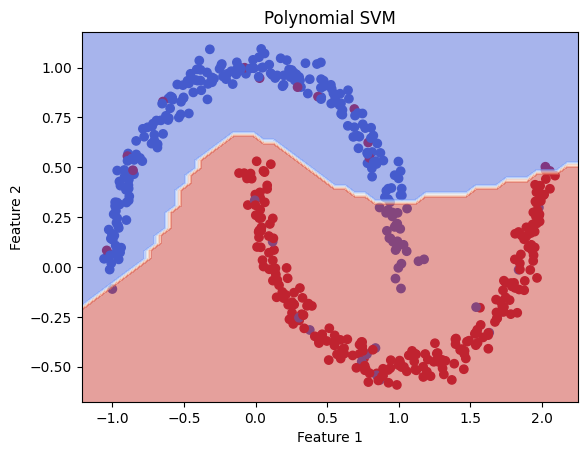

In [ ]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(data[[0, 1]], data['label'])
plt.scatter(data[0], data[1], c=data['label'], cmap='coolwarm')

Z_poly = svm_poly.predict(np.column_stack((x_cordi.reshape(-1, ), y_cordi.reshape(-1, ))))
Z_poly = Z_poly.reshape(x_cordi.shape)
plt.contourf(x_cordi, y_cordi, Z_poly, cmap='coolwarm', alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Polynomial SVM')
plt.show()

Impementation of SVM model with RBF kernel using SVC and plotting the decision boudary

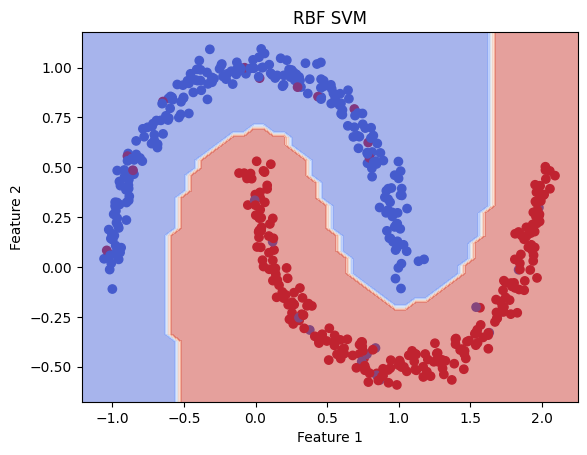

In [ ]:
svm_RBF = SVC(kernel='rbf')
svm_RBF.fit(data[[0, 1]], data['label'])

plt.scatter(data[0], data[1], c=data['label'], cmap='coolwarm')

Z_rbf = svm_RBF.predict(np.column_stack((x_cordi.reshape(-1, ), y_cordi.reshape(-1, ))))
Z_rbf = Z_rbf.reshape(x_cordi.shape)
plt.contourf(x_cordi, y_cordi, Z_rbf, cmap='coolwarm', alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RBF SVM')
plt.show()

(c) Hyperparameter tunning of RBF kernel SVM model using GridSearchCV model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[[0,1]], data['label'], test_size=0.2, random_state=34)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter = {'C':[0.1, 1, 10, 100], 'gamma':[0.1, 1, 10, 100], 'kernel':['rbf']}

svm_RBF = SVC()

grid_search = GridSearchCV(estimator=svm_RBF, param_grid=parameter, cv=7)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_parameter = grid_search.best_params_

print(best_parameter)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


(d) Decision Boundary plotting for the RBF kernel SVM with the best Hyperparameter and also finding the accuracy of model

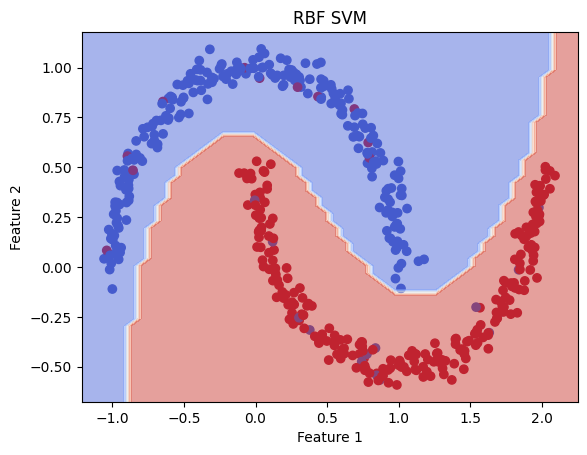

Accuracy of Test data= 0.92


In [ ]:
from sklearn.metrics import accuracy_score

svm_rbf_hyperpara = grid_search.best_estimator_
svm_rbf_hyperpara.fit(X_train, y_train)

plt.scatter(data[0], data[1], c=data['label'], cmap='coolwarm')

Z_rbf = svm_rbf_hyperpara.predict(np.column_stack((x_cordi.reshape(-1, ), y_cordi.reshape(-1, ))))
Z_rbf = Z_rbf.reshape(x_cordi.shape)
plt.contourf(x_cordi, y_cordi, Z_rbf, cmap='coolwarm', alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RBF SVM')
plt.show()

y_pred = svm_rbf_hyperpara.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Test data=",accuracy)